# Activity 1.2: Transform Grammar

Let's first import the example grammar from the fuzzing book

<div class="alert alert-success alertsuccess">
[Task] Implement the function <i>transform_grammar(sample, grammar)</i>, that transforms a grammar according to Kampmann et al.
</div>

In [4]:
from fuzzingbook.Grammars import EXPR_GRAMMAR

if __name__ == "__main__":
    for rule in EXPR_GRAMMAR:
        print(rule.ljust(10), EXPR_GRAMMAR[rule])

<start>    ['<expr>']
<expr>     ['<term> + <expr>', '<term> - <expr>', '<term>']
<term>     ['<factor> * <term>', '<factor> / <term>', '<factor>']
<factor>   ['+<factor>', '-<factor>', '(<expr>)', '<integer>.<integer>', '<integer>']
<integer>  ['<digit><integer>', '<digit>']
<digit>    ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Then, we generate a random input using the GrammarFuzzer:

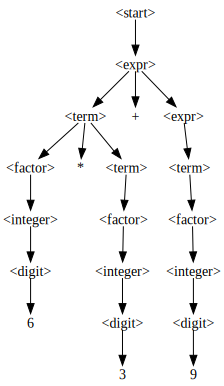

In [5]:
from fuzzingbook.GrammarFuzzer import GrammarFuzzer
from fuzzingbook.GrammarFuzzer import tree_to_string, display_tree
import random

# For this example, fix the random seed so that the produced output is deterministic
random.seed(24)
f = GrammarFuzzer(EXPR_GRAMMAR, max_nonterminals=3)
test_input = f.fuzz()
assert(test_input == tree_to_string(f.derivation_tree))

if __name__ == "__main__":
    display(display_tree(f.derivation_tree))

For the grammar transformation, we perform a *rewrite step* that for each non-terminal symbol in the grammar, determines the word derived by this symbol in the input and adds it as an alternative to the symbol (as written in the Alhazen-paper). Here, we iterate through the derivation tree of the input and add the derived word of each non-terminal as alternatives to the grammar.

# Implementing the Function `transform_grammar`

You should write a function `transform_grammar` that given a sample input and a grammar, transforms it according to Kampmann et al.

```python

def transform_grammar(sample: str,
                     grammar: Grammar) -> Grammar

```

**INPUT**:
the function requires the following input parameter:
- sample: a input sample 
- grammar: the grammar that should be transformed/extended

**OUTPUT**: the function should return the transformed and extended grammar.

In [6]:
from fuzzingbook.Grammars import Grammar

def transform_grammar(sample: str,
                      grammar: Grammar) -> Grammar:
    
    # write your code here
    raise NotImplementedError("Func. transform grammar: Function not Implemented")

Possible solution for the function `transform_grammar`:

In [7]:
from fuzzingbook.Grammars import is_nonterminal
from fuzzingbook.GrammarFuzzer import tree_to_string

# Then, recursively iterate through the derivation tree and for each non-terminal,
# add the derived word to the grammar

def extend_grammar(derivation_tree, grammar):
    (node, children) = derivation_tree
    
    if is_nonterminal(node):
        assert(node in grammar)
        word = tree_to_string(derivation_tree)
        
        # Only add to grammar if not already existent
        if word not in grammar[node]:
            grammar[node].append(word)
    
    for child in children:
        extend_grammar(child, grammar)

In [8]:
from fuzzingbook.GrammarFuzzer import GrammarFuzzer
from fuzzingbook.GrammarFuzzer import display_tree, tree_to_string
from fuzzingbook.Grammars import EXPR_GRAMMAR, Grammar

import random
import copy

from fuzzingbook.Parser import EarleyParser
from fuzzingbook.GrammarFuzzer import display_tree, tree_to_string

START_SYMBOL = "<start>"

def transform_grammar(sample: str,
                      grammar: Grammar) -> Grammar:
    
    # copy of the grammar
    transformed_grammar = copy.deepcopy(grammar)
    
    # parse sample
    earley = EarleyParser(grammar)
    for derivation_tree in earley.parse(sample):
        extend_grammar(derivation_tree, transformed_grammar)
            
    return transformed_grammar

Let's have a look at the transformed grammar:

In [9]:
# TODO Add better test case for correct validation

if __name__ == "__main__":
    transformed_grammar = transform_grammar("1 + 2", EXPR_GRAMMAR)
    for rule in transformed_grammar:
        print(rule.ljust(10), transformed_grammar[rule])

<start>    ['<expr>', '1 + 2']
<expr>     ['<term> + <expr>', '<term> - <expr>', '<term>', '1 + 2', '2']
<term>     ['<factor> * <term>', '<factor> / <term>', '<factor>', '1', '2']
<factor>   ['+<factor>', '-<factor>', '(<expr>)', '<integer>.<integer>', '<integer>', '1', '2']
<integer>  ['<digit><integer>', '<digit>', '1', '2']
<digit>    ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
